# Stack Overflow Survey Data

We will be using a dataset of stackover flow users on a survey about programming, job statisfacation, salaries, expected salaries and a whole bunch of stuff. 

We will import all the datasets from 2011 to 2020.

And we will be using The CRISP-DM Process

### 1.Business Understanding 

There are a some business question that we are trying to answer using this dataset.
These question are:
1.	What is the most used programming languages across the years?
2.	How the gender is represented in the programming society acroos the years?
3.	Did job satisfaction increased or decreased from 2011 to 2020?
4.  How salaries ranges changes over the years?
5.	Can we predict the individual salary in 2020 and what are the factors affecting this prediction most?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import helper as h
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
df11 = pd.read_csv('2011.csv')
df11 = df11.iloc[1:].reset_index()
pd.options.mode.chained_assignment = None  # default='warn'
# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header #set the header row as the df header
cmap = plt.cm.tab10
pd.set_option('display.max_columns', 500)

df11.head()

,index,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What types of purchases are you involved in?,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What type of project are you developing?,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
1,2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
2,3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Haskell,Linux,I enjoy going to work,Student / Unemployed,NaN,NaN,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow
4,5,Other Asia,NaN,35-39,11,Software Products,Start Up (1-25),"Executive (VP of Eng, CTO, CIO, etc.)",I run this place,Influencer,NaN,Approver,Purchaser,NaN,NaN,NaN,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Enterprise,Java,JavaScript,CSS,PHP,NaN,NaN,SQL,NaN,C++,C,Perl,NaN,NaN,Linux,It pays the bills,"$80,000 - $100,000",NaN,Android,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Xbox,NaN,NaN,NaN,$251-$500,Stack Overflow


In [2]:
df11.shape

(2813, 66)

## Data Understaning

## Question 1.	What is the most used programming languages across the years?

In [3]:
prog_lang_11 = df11[['Which languages are you proficient in?', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42']]

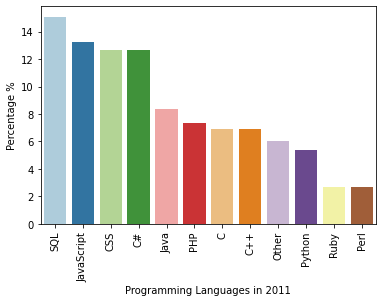

In [4]:
def prog_lang_plot(df, year):
    prog_langu = pd.melt(df, value_vars= df, ignore_index=False)
    votes = prog_langu['value'].value_counts()
    masked_votes = prog_langu.isin(votes[votes/prog_langu['value'].count() < 0.02].index)
    # print(masked_votes)
    prog_langu[masked_votes] = 'Other'
    prog_langu_count = prog_langu['value'].value_counts()
    sns.set_palette(sns.color_palette("Paired"))
    ax = sns.barplot(x = prog_langu_count.index,
            y = prog_langu_count/prog_langu_count.sum() * 100,
            data = df)
    ax.set(xlabel="Programming Languages in "+str(year), ylabel = "Percentage %")

    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    # Show the plot
    plt.show()

prog_lang_plot(prog_lang_11, 2011)
 

In [5]:
df12 = pd.read_csv('2012.csv')
df12 = df12.iloc[1:]
prog_lang_12 = df12[['Which languages are you proficient in?', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36']]

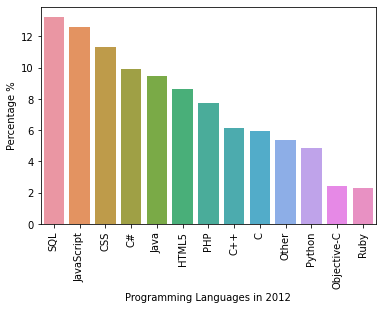

In [6]:
prog_lang_plot(prog_lang_12, 2012)

In [7]:
df13 = pd.read_csv('2013.csv')
df13 = df13.iloc[1:]
prog_lang_13 = df13[['Which of the following languages or technologies have you used significantly in the past year?', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69']]

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


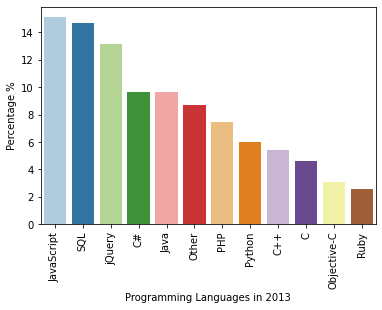

In [8]:
prog_lang_plot(prog_lang_13, 2013)

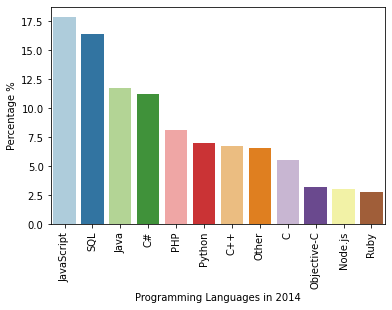

In [9]:
df14 = pd.read_csv('2014.csv')
df14 = df14.iloc[1:]
prog_lang_14 = df14[['Which of the following languages or technologies have you used significantly in the past year?', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53']]
prog_lang_plot(prog_lang_14, 2014)

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


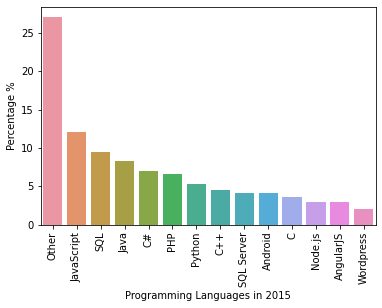

In [10]:
df15 = pd.read_csv('2015.csv')
new_header = df15.iloc[0] #grab the first row for the header
df15 = df15[1:] #take the data less the header row
df15.columns = new_header #set the header row as the df header
prog_lang_15 = df15[['Current Lang & Tech: Android', 'Current Lang & Tech: Arduino', 'Current Lang & Tech: AngularJS', 'Current Lang & Tech: C', 'Current Lang & Tech: C++', 'Current Lang & Tech: C++11', 'Current Lang & Tech: C#', 'Current Lang & Tech: Cassandra', 'Current Lang & Tech: CoffeeScript', 'Current Lang & Tech: Cordova', 'Current Lang & Tech: Clojure', 'Current Lang & Tech: Cloud', 'Current Lang & Tech: Dart', 'Current Lang & Tech: F#', 'Current Lang & Tech: Go', 'Current Lang & Tech: Hadoop', 'Current Lang & Tech: Haskell', 'Current Lang & Tech: iOS', 'Current Lang & Tech: Java', 'Current Lang & Tech: JavaScript', 'Current Lang & Tech: LAMP', 'Current Lang & Tech: Matlab', 'Current Lang & Tech: MongoDB', 'Current Lang & Tech: Node.js', 'Current Lang & Tech: Objective-C', 'Current Lang & Tech: Perl', 'Current Lang & Tech: PHP',
       'Current Lang & Tech: Python', 'Current Lang & Tech: R', 'Current Lang & Tech: Redis', 'Current Lang & Tech: Ruby', 'Current Lang & Tech: Rust', 'Current Lang & Tech: Salesforce', 'Current Lang & Tech: Scala', 'Current Lang & Tech: Sharepoint', 'Current Lang & Tech: Spark', 'Current Lang & Tech: SQL', 'Current Lang & Tech: SQL Server', 'Current Lang & Tech: Swift', 'Current Lang & Tech: Visual Basic', 'Current Lang & Tech: Windows Phone', 'Current Lang & Tech: Wordpress', 'Current Lang & Tech: Write-In']]
prog_lang_plot(prog_lang_15, 2015)


In [11]:
df16 = pd.read_csv('2016.csv')

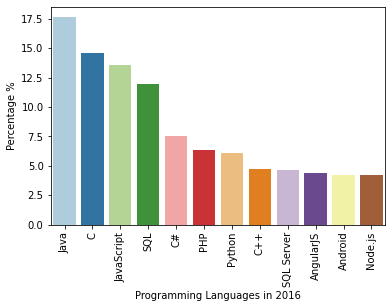

In [12]:
possible_vals = ['Other', 'JavaScript', 'SQL', 'Java', 'C#', 'PHP', 'Python', 'C++', 'SQL Server', 'Android', 'C', 'Node.js', 'AngularJS', 'Wordpress']
def clean_plot(df, column_name, year):
    prog_langs = df[column_name].value_counts().reset_index()
    prog_langs.rename(columns={'index': 'Programming Languages', column_name: 'count'}, inplace=True)
    prog_langs_df = h.total_count(prog_langs, 'Programming Languages', 'count', possible_vals)
    prog_langs_df.set_index('Programming Languages', inplace=True)
    prog_langs_df = prog_langs_df.squeeze()
    sns.set_palette(sns.color_palette("Paired"))
    ax = sns.barplot(x = prog_langs_df.index,
            y = prog_langs_df/prog_langs_df.sum() * 100,
            data = df)
    ax.set(xlabel="Programming Languages in "+ str(year), ylabel = "Percentage %")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

    # Show the plot
    plt.show()
clean_plot(df16, 'tech_do', 2016)


In [13]:
df17 = pd.read_csv('2017.csv')

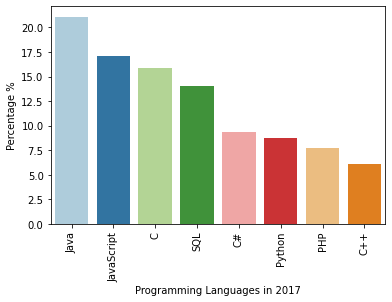

In [14]:
clean_plot(df17, 'HaveWorkedLanguage', 2017)



In [15]:
df18 = pd.read_csv('2018.csv')


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


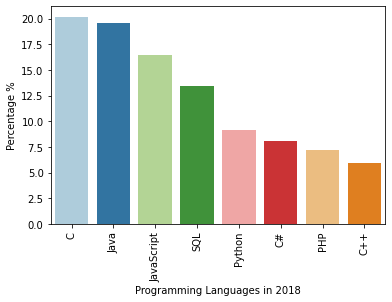

In [16]:
clean_plot(df18, 'LanguageWorkedWith', 2018)


In [17]:
df19 = pd.read_csv('2019.csv')


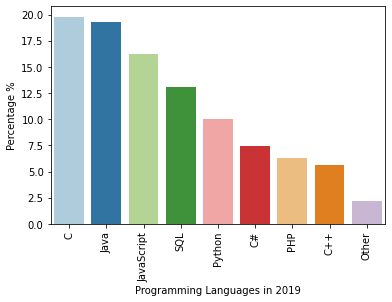

In [18]:
clean_plot(df19, 'LanguageWorkedWith', 2019)


In [19]:
df20 = pd.read_csv('2020.csv')


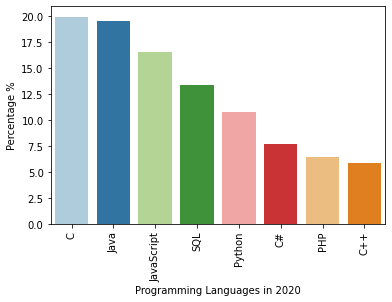

In [20]:
clean_plot(df20, 'LanguageWorkedWith', 2020)


##### We can see that along the years the most used four languages where C, Java, Javascript, SQL ..
#### Python was in the top 10 back in 2011 , 2012 and started climbing its way to the top five used languages

## Question 2.	How the gender is represented in the programming society acroos the years?

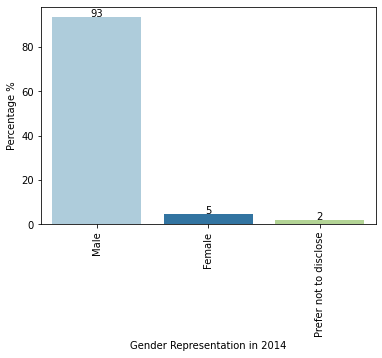

In [21]:
def gender_plot(df, column_name, year):
    gender_count = df[column_name].value_counts()
    sns.set_palette(sns.color_palette("Paired"))
    ax = sns.barplot(x = gender_count.index,
            y = gender_count/gender_count.sum() * 100,
            data = df)
    ax.set(xlabel="Gender Representation in "+ str(year), ylabel = "Percentage %")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1, round(gender_count[i]/gender_count.sum() * 100),ha="center")

    # Show the plot
    plt.show()
gender_plot(df14, 'What is your gender?', 2014)


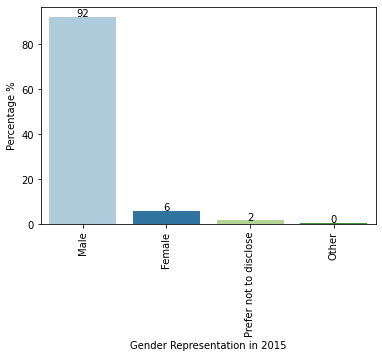

In [22]:
gender_plot(df15, 'Gender', 2015)


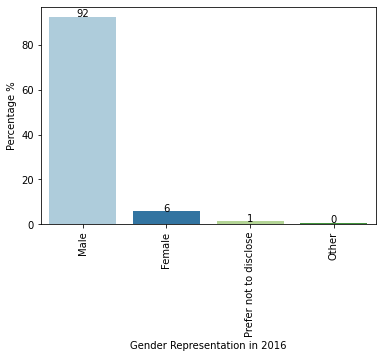

In [23]:
gender_plot(df16, 'gender', 2016)


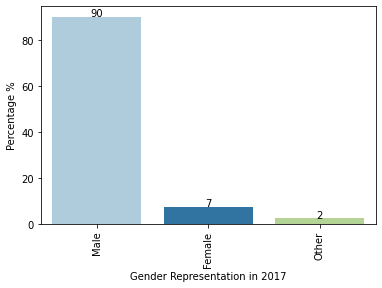

In [24]:
def combine_gender(df, column_name):
    votes = df[column_name].value_counts()
    mask = (votes/votes.sum() * 100).lt(1)
    # To replace df['column'] use np.where I.e 
    df[column_name] = np.where(df[column_name].isin(votes[mask].index),'Other',df[column_name])
combine_gender(df17, 'Gender')
gender_plot(df17, 'Gender', 2017)


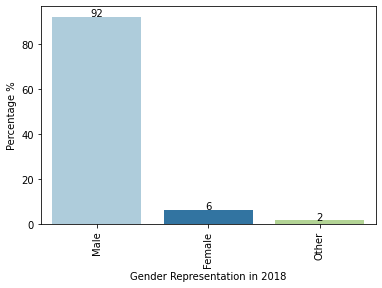

In [25]:
combine_gender(df18, 'Gender')
gender_plot(df18, 'Gender', 2018)

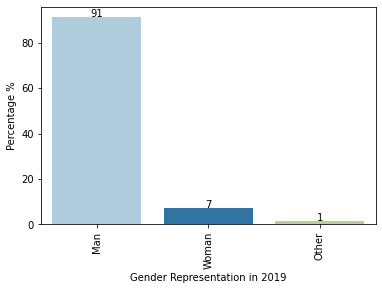

In [26]:
combine_gender(df19, 'Gender')
gender_plot(df19, 'Gender', 2019)

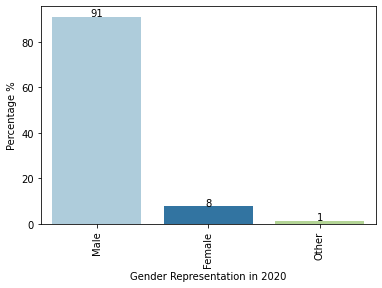

In [27]:
combine_gender(df20, 'Gender')
df20['Gender'][df20['Gender'] == "Man"] = "Male"
df20['Gender'][df20['Gender'] == "Woman"] = "Female"
gender_plot(df20, 'Gender', 2020)

##### Female representation was about 4 to 5 percent back in 2011, 2012 but this percent kept increasing till reached 8 percent in 2020

## Question 3.	Did job satisfaction increased or decreased from 2011 to 2020?

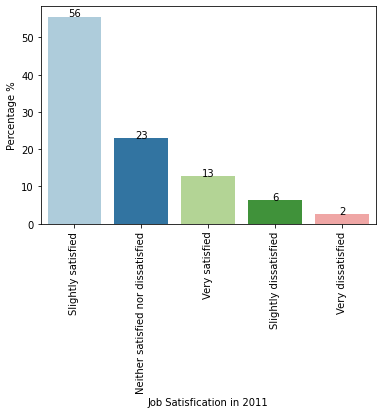

In [28]:
df11.rename(columns={'Please rate your job/career satisfaction': 'JobSatisfaction'}, inplace=True)
def Satisfaction_plot(df, column_name, year):
    gender_count = df[column_name].value_counts()
    sns.set_palette(sns.color_palette("Paired"))
    ax = sns.barplot(x = gender_count.index,
            y = gender_count/gender_count.sum() * 100,
            data = df)
    ax.set(xlabel="Job Satisfication in "+ str(year), ylabel = "Percentage %")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1, round(gender_count[i]/gender_count.sum() * 100),ha="center")

    # Show the plot
    plt.show()
    
df11['JobSatisfaction'][df11['JobSatisfaction'].isin(['FML'])] = 'Very dissatisfied'
df11['JobSatisfaction'][df11['JobSatisfaction'].isin(["I'm not happy in my job"])] = 'Slightly dissatisfied'
df11['JobSatisfaction'][df11['JobSatisfaction'].isin(["It pays the bills"])] = 'Neither satisfied nor dissatisfied'
df11['JobSatisfaction'][df11['JobSatisfaction'].isin(["I enjoy going to work"])] = 'Slightly satisfied'
df11['JobSatisfaction'][df11['JobSatisfaction'].isin(["So happy it hurts"])] = 'Very satisfied'
Satisfaction_plot(df11, 'JobSatisfaction', 2011)



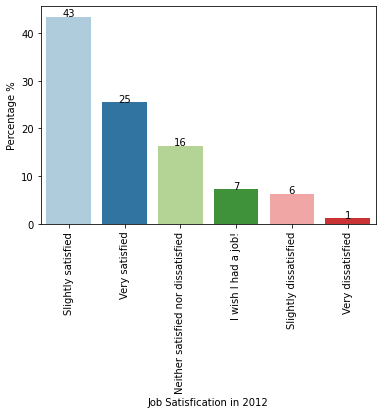

In [29]:
df12.rename(columns={'What best describes your career / job satisfaction? ': 'JobSatisfaction'}, inplace=True)
df12['JobSatisfaction'][df12['JobSatisfaction'].isin(['Hate my job'])] = 'Very dissatisfied'
df12['JobSatisfaction'][df12['JobSatisfaction'].isin(["I'm not happy in my job"])] = 'Slightly dissatisfied'
df12['JobSatisfaction'][df12['JobSatisfaction'].isin(["Its a paycheck"])] = 'Neither satisfied nor dissatisfied'
df12['JobSatisfaction'][df12['JobSatisfaction'].isin(["I enjoy going to work"])] = 'Slightly satisfied'
df12['JobSatisfaction'][df12['JobSatisfaction'].isin(["Love my job"])] = 'Very satisfied'
Satisfaction_plot(df12, 'JobSatisfaction', 2012)


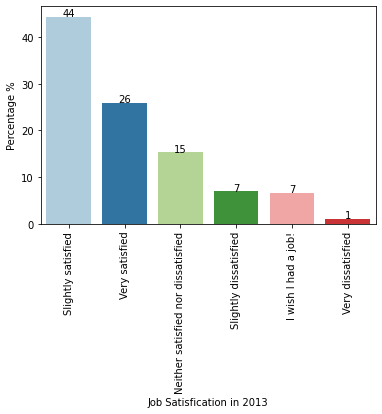

In [30]:
df13.rename(columns={'What best describes your career / job satisfaction?': 'JobSatisfaction'}, inplace=True)
df13['JobSatisfaction'][df13['JobSatisfaction'].isin(['Hate my job'])] = 'Very dissatisfied'
df13['JobSatisfaction'][df13['JobSatisfaction'].isin(["I'm not happy in my job"])] = 'Slightly dissatisfied'
df13['JobSatisfaction'][df13['JobSatisfaction'].isin(["It's a paycheck"])] = 'Neither satisfied nor dissatisfied'
df13['JobSatisfaction'][df13['JobSatisfaction'].isin(["I enjoy going to work"])] = 'Slightly satisfied'
df13['JobSatisfaction'][df13['JobSatisfaction'].isin(["Love my job"])] = 'Very satisfied'
Satisfaction_plot(df13, 'JobSatisfaction', 2013)


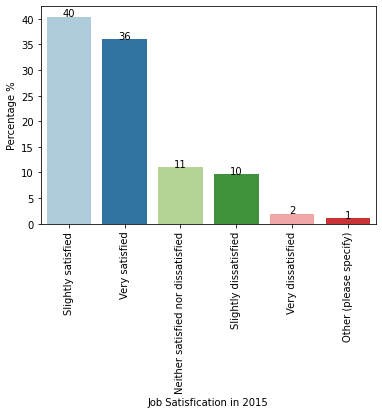

In [31]:
df15.rename(columns={'Job Satisfaction': 'JobSatisfaction'}, inplace=True)
df15['JobSatisfaction'][df15['JobSatisfaction'].isin(['I hate my job'])] = 'Very dissatisfied'
df15['JobSatisfaction'][df15['JobSatisfaction'].isin(["I'm somewhat dissatisfied with my job"])] = 'Slightly dissatisfied'
df15['JobSatisfaction'][df15['JobSatisfaction'].isin(["I'm neither satisfied nor dissatisfied with my job"])] = 'Neither satisfied nor dissatisfied'
df15['JobSatisfaction'][df15['JobSatisfaction'].isin(["I'm somewhat satisfied with my job"])] = 'Slightly satisfied'
df15['JobSatisfaction'][df15['JobSatisfaction'].isin(["I love my job"])] = 'Very satisfied'
Satisfaction_plot(df15, 'JobSatisfaction', 2015)

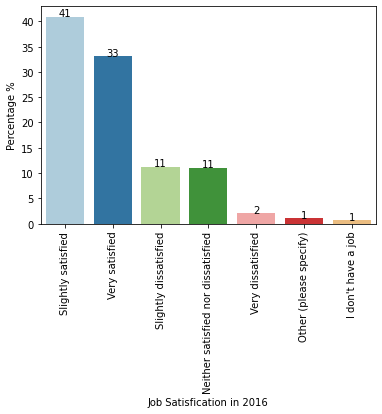

In [32]:
df16.rename(columns={'job_satisfaction': 'JobSatisfaction'}, inplace=True)
df16['JobSatisfaction'][df16['JobSatisfaction'].isin(['I hate my job'])] = 'Very dissatisfied'
df16['JobSatisfaction'][df16['JobSatisfaction'].isin(["I'm somewhat dissatisfied with my job"])] = 'Slightly dissatisfied'
df16['JobSatisfaction'][df16['JobSatisfaction'].isin(["I'm neither satisfied nor dissatisfied"])] = 'Neither satisfied nor dissatisfied'
df16['JobSatisfaction'][df16['JobSatisfaction'].isin(["I'm somewhat satisfied with my job"])] = 'Slightly satisfied'
df16['JobSatisfaction'][df16['JobSatisfaction'].isin(["I love my job"])] = 'Very satisfied'
Satisfaction_plot(df16, 'JobSatisfaction', 2016)

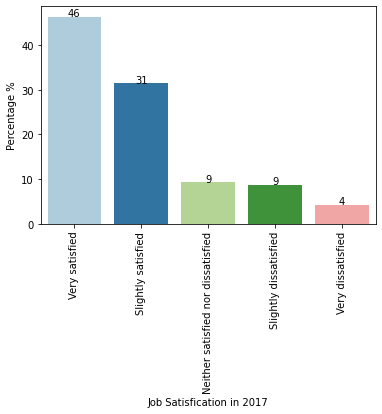

In [33]:
df17['JobSatisfaction'][df17['JobSatisfaction'].isin([0.0, 1.0, 2.0])] = 'Very dissatisfied'
df17['JobSatisfaction'][df17['JobSatisfaction'].isin([3.0, 4.0])] = 'Slightly dissatisfied'
df17['JobSatisfaction'][df17['JobSatisfaction'].isin([5.0])] = 'Neither satisfied nor dissatisfied'
df17['JobSatisfaction'][df17['JobSatisfaction'].isin([6.0, 7.0])] = 'Slightly satisfied'
df17['JobSatisfaction'][df17['JobSatisfaction'].isin([8.0, 9.0, 10.0])] = 'Very satisfied'


                        
Satisfaction_plot(df17, 'JobSatisfaction', 2017)

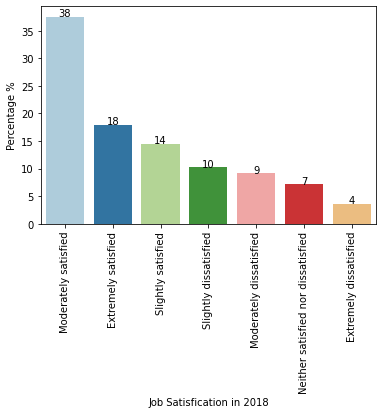

In [34]:

Satisfaction_plot(df18, 'JobSatisfaction', 2018)



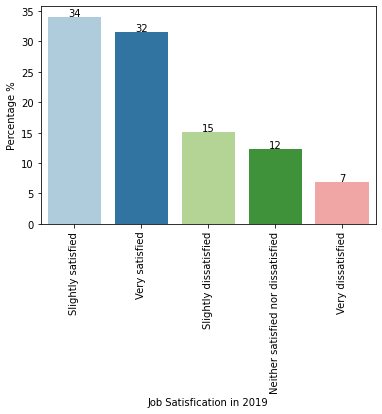

In [35]:
df19.rename(columns={'JobSat': 'JobSatisfaction'}, inplace=True)
Satisfaction_plot(df19, 'JobSatisfaction', 2019)

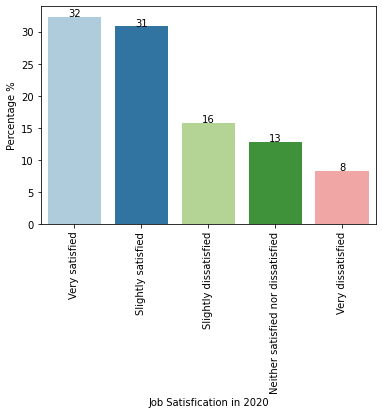

In [36]:
df20.rename(columns={'JobSat': 'JobSatisfaction'}, inplace=True)
Satisfaction_plot(df20, 'JobSatisfaction', 2020)


##### Job Satisfaction was good back in 2011, 2012 but it increased gradually till reached its highest rates in 2019, 2020

## Question 4.  How salaries ranges changes over the years?


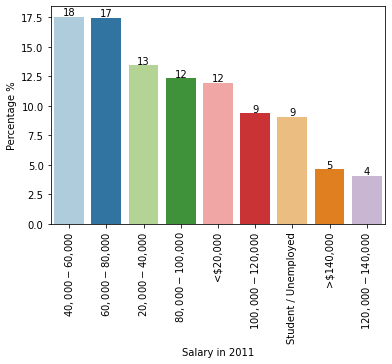

In [37]:
df11.rename(columns={'Including bonus, what is your annual compensation in USD?': 'Salary'}, inplace=True)

def salary_plot(df, column_name, year):
    gender_count = df[column_name].value_counts()
    sns.set_palette(sns.color_palette("Paired"))
    ax = sns.barplot(x = gender_count.index,
            y = gender_count/gender_count.sum() * 100,
            data = df)
    ax.set(xlabel="Salary in "+ str(year), ylabel = "Percentage %")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1, round(gender_count[i]/gender_count.sum() * 100),ha="center")

    # Show the plot
    plt.show()
salary_plot(df11, 'Salary', 2011)

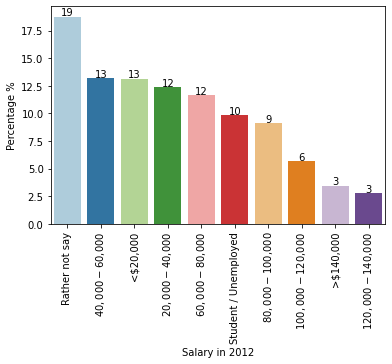

In [38]:
df12.rename(columns={'Including bonus, what is your annual compensation in USD?': 'Salary'}, inplace=True)
salary_plot(df12, 'Salary', 2012)

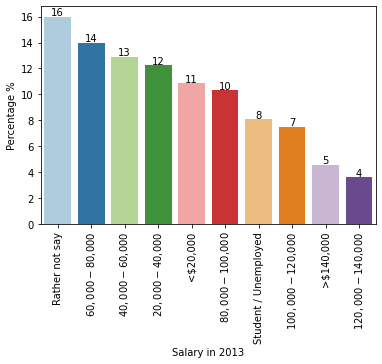

In [39]:
df13.rename(columns={'Including bonus, what is your annual compensation in USD?': 'Salary'}, inplace=True)
salary_plot(df13, 'Salary', 2013)

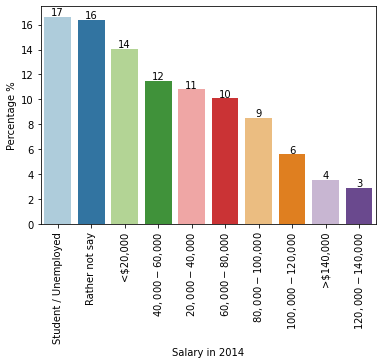

In [40]:
df14.rename(columns={'Including bonus, what is your annual compensation in USD?': 'Salary'}, inplace=True)
salary_plot(df14, 'Salary', 2014)

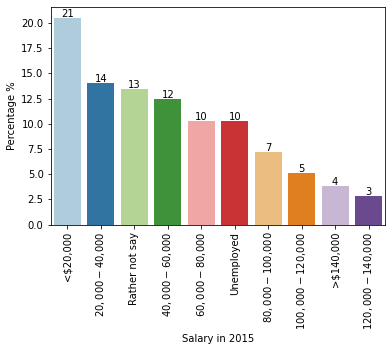

In [41]:
df15.rename(columns={'Compensation': 'Salary'}, inplace=True)
df15['Salary'][df15['Salary'] == 'Less than $20,000'] = '<$20,000'
df15['Salary'][(df15['Salary'] == '$140,000 - $160,000') | (df15['Salary'] == 'More than $160,000')] = '>$140,000'

salary_plot(df15, 'Salary', 2015)

In [42]:
df16.rename(columns={'salary_range': 'Salary'}, inplace=True)


In [43]:
df16['Salary'][(df16['Salary']=='Less than $10,000') | (df16['Salary']=='$10,000 - $20,000')] = '<$20,000'
df16['Salary'][(df16['Salary']=='$20,000 - $30,000') | (df16['Salary']=='$30,000 - $40,000')] = '$20,000 - $40,000'
df16['Salary'][(df16['Salary']=='$40,000 - $50,000') | (df16['Salary']=='$50,000 - $60,000')] = '$40,000 - $60,000'
df16['Salary'][(df16['Salary']=='$60,000 - $70,000') | (df16['Salary']=='$70,000 - $80,000')] = '$60,000 - $80,000'
df16['Salary'][(df16['Salary']=='$80,000 - $90,000') | (df16['Salary']=='$90,000 - $100,000')] = '$80,000 - $100,000'
df16['Salary'][(df16['Salary']=='$100,000 - $110,000') | (df16['Salary']=='$110,000 - $120,000')] = '$100,000 - $120,000'
df16['Salary'][(df16['Salary']=='$120,000 - $130,000') | (df16['Salary']=='$130,000 - $140,000')] = '$120,000 - $140,000'
df16['Salary'][df16['Salary'].isin(['$140,000 - $150,000', '$150,000 - $160,000', '$160,000 - $170,000', '$170,000 - $180,000', '$180,000 - $190,000', '$190,000 - $200,000', 'More than $200,000'])] = '>$140,000'

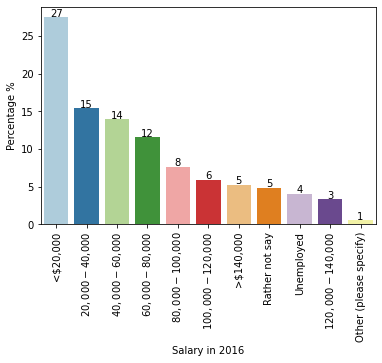

In [44]:
salary_plot(df16, 'Salary', 2016)

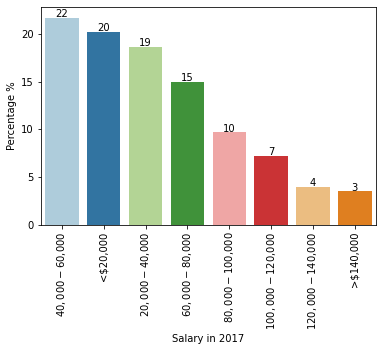

In [45]:
# bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 200000]
# df17['Binned_Salary'] = pd.cut(df17['Salary'], bins)
# df17['Binned_Salary'] =  df17['Binned_Salary'].astype("string")
# df17['Binned_Salary'][df17['Binned_Salary'] == '(40000.0, 60000.0]'] = '$40,000 - $60,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(20000.0, 40000.0]'] = '$20,000 - $40,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(60000.0, 80000.0]'] = '$60,000 - $80,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(80000.0, 100000.0]'] = '$80,000 - $100,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(100000.0, 120000.0]'] = '$100,000 - $120,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(120000.0, 140000.0]'] = '$120,000 - $140,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(140000.0, 200000.0]'] = '>$140,000'
# df17['Binned_Salary'][df17['Binned_Salary'] == '(0.0, 20000.0]'] = '<$20,000'

def salary_binning(df, column_name):
    bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 200000]
    df[column_name] = df[column_name].replace(r',', '', regex=True).astype(float)
    df['Binned_Salary'] = pd.cut(df[column_name], bins)
    df['Binned_Salary'] =  df['Binned_Salary'].astype("string")
    df['Binned_Salary'][df['Binned_Salary'] == '(40000.0, 60000.0]'] = '$40,000 - $60,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(20000.0, 40000.0]'] = '$20,000 - $40,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(60000.0, 80000.0]'] = '$60,000 - $80,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(80000.0, 100000.0]'] = '$80,000 - $100,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(100000.0, 120000.0]'] = '$100,000 - $120,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(120000.0, 140000.0]'] = '$120,000 - $140,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(140000.0, 200000.0]'] = '>$140,000'
    df['Binned_Salary'][df['Binned_Salary'] == '(0.0, 20000.0]'] = '<$20,000'
salary_binning(df17, 'Salary')
salary_plot(df17, 'Binned_Salary', 2017)

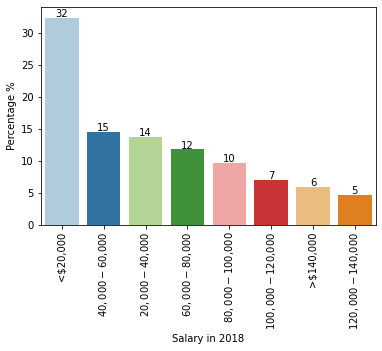

In [46]:
salary_binning(df18, 'Salary')
salary_plot(df18, 'Binned_Salary', 2018)
    
    

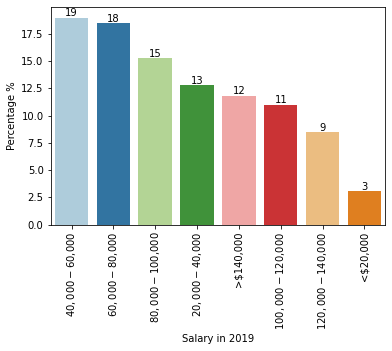

In [47]:
df19['CompTotal'] = df19['CompTotal'][df19['CompFreq'] == 'Yearly']
df19['CompTotal']
salary_binning(df19, 'CompTotal')
salary_plot(df19, 'Binned_Salary', 2019)

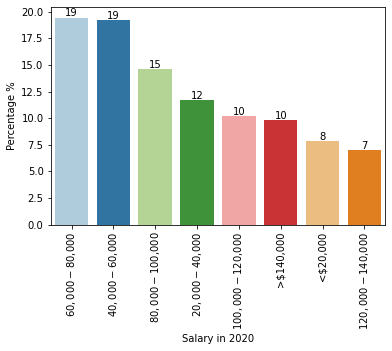

In [48]:
df20['ConvertedComp'] = df20['ConvertedComp'][df20['CompFreq'] == 'Yearly']
df20['ConvertedComp']
salary_binning(df20, 'ConvertedComp')
salary_plot(df20, 'Binned_Salary', 2020)

#### We can see that frequent salaries ranges sarted between 40 and 80 thousands back in 2011, 2012 then droped to 30 to 60 in 2014, 2015, 2016 then started increasing till reached its hightest in 2019 , 2020 with 60 to 100. 

## 3.Prepare Data

In [49]:
df20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSatisfaction,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,Binned_Salary
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Male,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,<NA>
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,<NA>
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,<NA>
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Male,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (p

##  Question 5.	Can we predict the individual salary in 2020 and what are the factors affecting this prediction most?

In [50]:
# dropped binned salary first
df20.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,1.910700e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,8.774631e+04,40.782174
std,18967.442360,9.585392,inf,7.570912e+04,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,4.756300e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,7.367800e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,1.100000e+05,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


A picture can often tell us more than numbers.

array([[<AxesSubplot:title={'center':'Respondent'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'CompTotal'}>,
        <AxesSubplot:title={'center':'ConvertedComp'}>],
       [<AxesSubplot:title={'center':'WorkWeekHrs'}>, <AxesSubplot:>]],
      dtype=object)

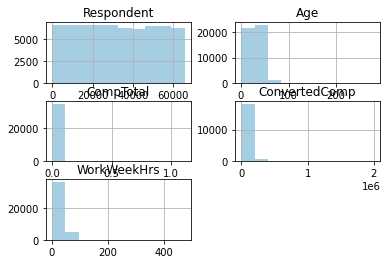

In [51]:
df20.hist()

Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

<AxesSubplot:>

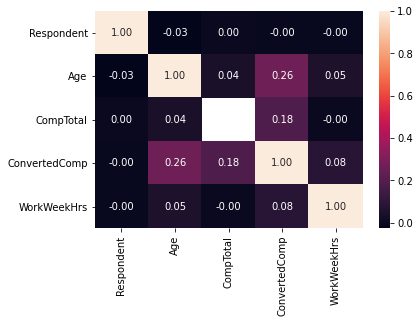

In [52]:
sns.heatmap(df20.corr(), annot=True, fmt='.2f')

In [53]:
def clean_data(df):
    '''
    INPUT: df - pandas dataframe
    
    OUTPUT:
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - The corresponding response vector
    
    This function cleans df using the following steps to product X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['ConvertedComp'], axis=0)
    y = df['ConvertedComp']
    
    # Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ConvertedComp', 'Binned_Salary', 'CompFreq', 'CompTotal','CurrencyDesc','CurrencySymbol'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    # Dummy the categorical variables
    cat_vars= df.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    X = df
    return X, y
#Use the function to create X and y
X, y = clean_data(df20)

## 4. Data Modeling

One of the main ways for working with categorical variables is using 0, 1 encodings. In this technique, you create a new column for every level of the categorical variable. The advantages of this approach include:

1. The ability to have differing influences of each level on the response.
2. You do not impose a rank of the categories.
3. The ability to interpret the results more easily than other encodings.
The disadvantages of this approach are that you introduce a large number of effects into your model. If you have a large number of categorical variables or categorical variables with a large number of levels, but not a large sample size, you might not be able to estimate the impact of each of these variables on your response variable. There are some rules of thumb that suggest 10 data points for each variable you add to your model. That is 10 rows for each column. This is a reasonable lower bound, but the larger your sample (assuming it is representative), the better.

Let's try out adding dummy variables for the categorical variables into the model. We will compare to see the improvement over the original model only using quantitative variables.

In [58]:
def find_optimal_lm_mod(X, y, cutoffs, test_size=0.35, random_state=20, plot =True):
    '''
    INPUT
    X- pandas dataframe, X matrix
    y- pandas dataframe, response variable
    cuttoffs - list of int, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the propertion of data as test data
    random_state - int, defualt 42, controls random state for train_test_split
    plot - boolean, default True, to plot result
    
    OUPUT
    r2_scores_test - list of  floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from skelearn
    X_train, X_test, y_train, y_test - ouput from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test, best_cutoff

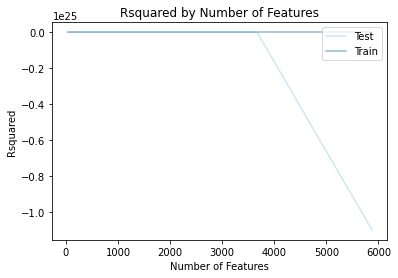

In [59]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test, best_cutoff = find_optimal_lm_mod(X, y, cutoffs)

In [60]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2
print(best_cutoff)

674
0.3126632881719237
0.3877788287813423
100


## 5. Evaluate the Results

#### - The optimal number of features is 696
#### - The model we should implement in practice has a train rsquared of 1
#### - The model we should implement in practice has a test rsquared of 1
#### - If we were to allow the number of features to continue to increase we would likely have a better rsquared for the training data but a much worse test rsquared.

The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty. 
Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary. 
The larger the coefficient, the larger the expected impact on salary.

In [57]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
42,Country_United States,63852.141699,63852.141699
40,Country_Switzerland,49260.611870,49260.611870
25,Age1stCode_Younger than 5 years,39900.710277,39900.710277
197,LanguageDesireNextYear_Rust,32861.465549,32861.465549
662,YearsCodePro_24,30577.285615,30577.285615
32,Country_India,-30571.955015,30571.955015
622,YearsCode_2,-29011.147613,29011.147613
632,YearsCode_3,-28155.345556,28155.345556
664,YearsCodePro_26,23863.666725,23863.666725
640,YearsCode_4,-23777.561499,23777.561499
